# Load Prediction Model (Binary classification)

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df= pd.read_csv('loan_approval_data.csv')

In [69]:
df.head()

,loan_id,no_of_dependents,education,self_employed,employment_type,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,12th,No,Salaried,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,12th,No,Salaried,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,8th,No,Salaried,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,8th,No,Salaried,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Graduate,No,Salaried,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   employment_type           4269 non-null   object
 5   income_annum              4269 non-null   int64 
 6   loan_amount               4269 non-null   int64 
 7   loan_term                 4269 non-null   int64 
 8   cibil_score               4269 non-null   int64 
 9   residential_assets_value  4269 non-null   int64 
 10  commercial_assets_value   4269 non-null   int64 
 11  luxury_assets_value       4269 non-null   int64 
 12  bank_asset_value          4269 non-null   int64 
 13  loan_status               4269 non-null   object
dtypes: int64(10), object(4)


In [71]:
# Classification problem
# thinking to solve with logistic regression 

---------

# EDA

In [72]:
df.nunique()

loan_id                     4269
no_of_dependents               6
education                      4
self_employed                  2
employment_type                3
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
loan_status                    2
dtype: int64

In [73]:
l=['no_of_dependents','education','employment_type','loan_term']
for i in l:
    print(df[i].unique(),'\n')
# df['no_of_dependents'].unique()

[2 0 3 5 4 1] 

['12th' '8th' 'Graduate' '10th'] 

['Salaried' 'Business' 'Freelancer'] 

[12  8 20 10  4  2 18 16 14  6] 



In [76]:
# lets turn loan amount to lakhs and all other big numeric columns too.
df['income_annum']=df['income_annum']/1e5

In [77]:
df = df.rename(columns={'income_annum': 'income_annum_lakhs'})

In [78]:
ls=['loan_amount','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
for i in ls:
    df[i]=df[i]/1e5
    df= df.rename(columns={i:i+'_lakhs'})

In [79]:
df.head()

,loan_id,no_of_dependents,education,self_employed,employment_type,income_annum_lakhs,loan_amount_lakhs,loan_term,cibil_score,residential_assets_value_lakhs,commercial_assets_value_lakhs,luxury_assets_value_lakhs,bank_asset_value_lakhs,loan_status
0,1,2,12th,No,Salaried,96.0,299.0,12,778,24.0,176.0,227.0,80.0,Approved
1,2,0,12th,No,Salaried,41.0,122.0,8,417,27.0,22.0,88.0,33.0,Rejected
2,3,3,8th,No,Salaried,91.0,297.0,20,506,71.0,45.0,333.0,128.0,Rejected
3,4,3,8th,No,Salaried,82.0,307.0,8,467,182.0,33.0,233.0,79.0,Rejected
4,5,5,Graduate,No,Salaried,98.0,242.0,20,382,124.0,82.0,294.0,50.0,Rejected


<AxesSubplot:xlabel='loan_amount_lakhs', ylabel='Count'>

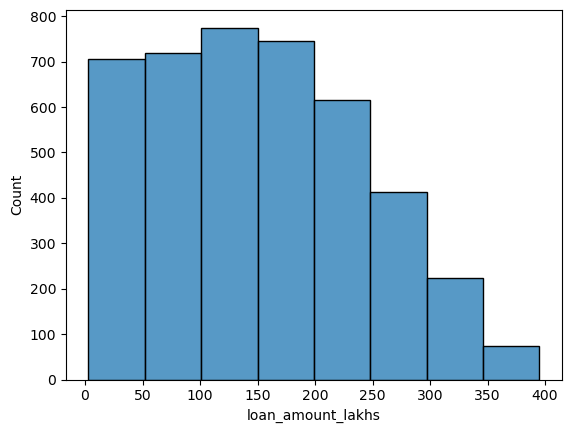

In [80]:
#histogram
sns.histplot(df['loan_amount_lakhs'], bins=8)

Approved    2656
Rejected    1613
Name: loan_status, dtype: int64


C:\Users\Om N. Gayamukhe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


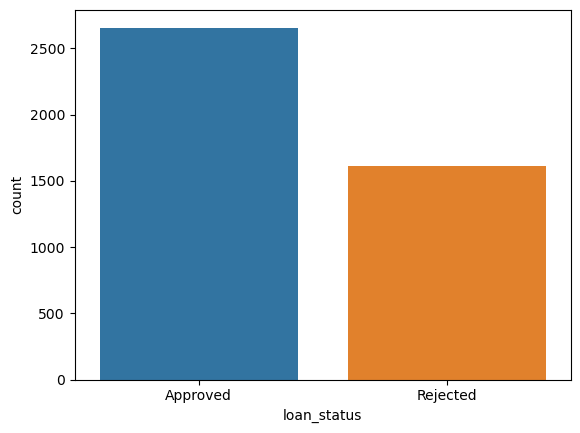

In [81]:
# is data balanced or unbalanced
sns.countplot(df['loan_status'])
print(df['loan_status'].value_counts())
# SO data unbalanced

Our data is unbalanced 

Text(0.5, 1.0, 'Distribution of Employment Types')

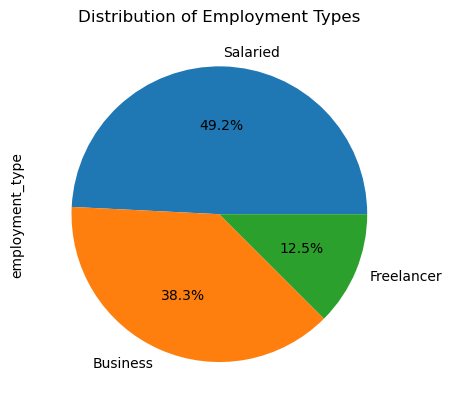

In [83]:
# how loan amount vary with employment type
# pie chart

df['employment_type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# Customize the plot
plt.title('Distribution of Employment Types')

<AxesSubplot:xlabel='loan_amount_lakhs', ylabel='Count'>

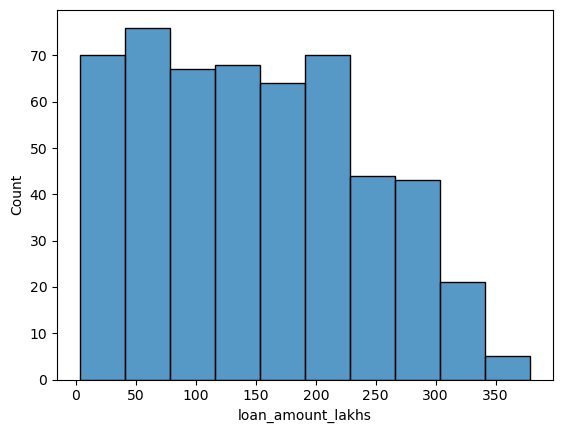

In [176]:
# hist plot for salary people loans
sns.histplot(data=df[df['employment_type'] == 'Freelancer'],bins=10, x='loan_amount_lakhs')

<AxesSubplot:xlabel='loan_amount_lakhs', ylabel='cibil_score'>

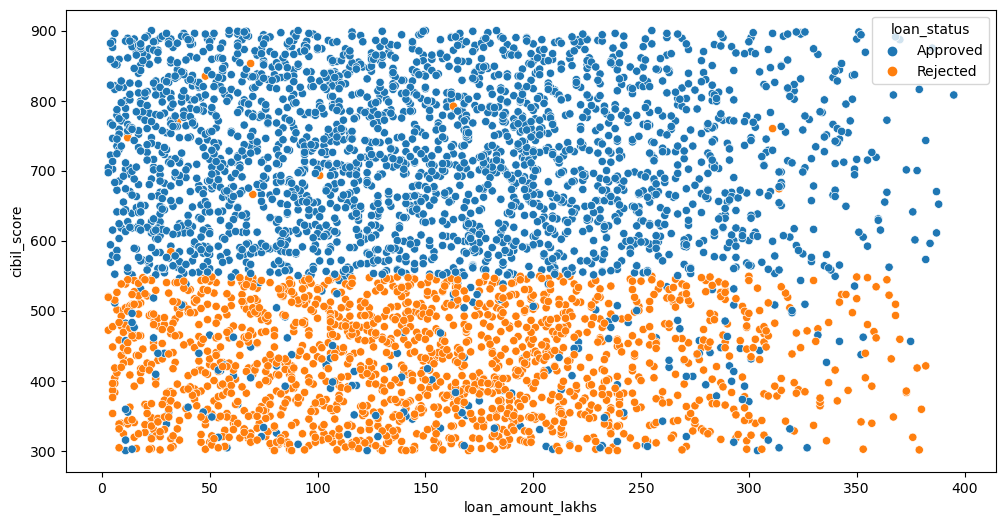

In [178]:
# Scatter plt to see how cibil score affects loan approval
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, y='cibil_score', x='loan_amount_lakhs', hue='loan_status')

This plot show clear boundary of loan approval

In [87]:
df[df['self_employed']=='Yes']['employment_type'].value_counts()
# So self employment has two types only

Business      1635
Freelancer     533
Name: employment_type, dtype: int64

In [88]:
# We can remove self emplyed column since it doesn't add to anything 
df= df.drop(columns=['self_employed'])

In [89]:
df.head()

,loan_id,no_of_dependents,education,employment_type,income_annum_lakhs,loan_amount_lakhs,loan_term,cibil_score,residential_assets_value_lakhs,commercial_assets_value_lakhs,luxury_assets_value_lakhs,bank_asset_value_lakhs,loan_status
0,1,2,12th,Salaried,96.0,299.0,12,778,24.0,176.0,227.0,80.0,Approved
1,2,0,12th,Salaried,41.0,122.0,8,417,27.0,22.0,88.0,33.0,Rejected
2,3,3,8th,Salaried,91.0,297.0,20,506,71.0,45.0,333.0,128.0,Rejected
3,4,3,8th,Salaried,82.0,307.0,8,467,182.0,33.0,233.0,79.0,Rejected
4,5,5,Graduate,Salaried,98.0,242.0,20,382,124.0,82.0,294.0,50.0,Rejected


In [90]:
df[df['employment_type']=='Business'].describe()

,loan_id,no_of_dependents,income_annum_lakhs,loan_amount_lakhs,loan_term,cibil_score,residential_assets_value_lakhs,commercial_assets_value_lakhs,luxury_assets_value_lakhs,bank_asset_value_lakhs
count,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000,1635.000000
mean,2096.989602,2.541284,50.678899,151.367584,10.844037,595.982263,73.804281,50.306422,152.152905,49.714373
std,1240.197547,1.696703,28.122551,90.351368,5.666541,172.729599,63.832263,43.878445,92.712047,32.466795
min,7.000000,0.000000,2.000000,3.000000,2.000000,300.000000,-1.000000,0.000000,3.000000,0.000000
25%,1017.000000,1.000000,27.000000,81.000000,6.000000,445.500000,21.500000,14.000000,75.000000,24.000000
50%,2090.000000,3.000000,51.000000,144.000000,10.000000,593.000000,56.000000,38.000000,145.000000,45.000000
75%,3196.000000,4.000000,75.500000,213.000000,16.000000,745.000000,112.000000,78.000000,219.000000,71.000000
max,4269.000000,5.000000,99.000000,388.000000,20.000000,900.000000,291.000000,190.000000,392.000000,147.000000


In [91]:
df['residential_assets_value_lakhs'].min()
#how is this negative

-1.0

Anomaly detected. How can an Residential Asset value be negative

In [92]:
for i in df.columns:
    print( df[i].min())

1
0
10th
Business
2.0
3.0
2
300
-1.0
0.0
3.0
0.0
Approved


In [93]:
df[df['residential_assets_value_lakhs']== -1.0]
#residential assets are physical in nature they can't be negative
# we will remove this rows

,loan_id,no_of_dependents,education,employment_type,income_annum_lakhs,loan_amount_lakhs,loan_term,cibil_score,residential_assets_value_lakhs,commercial_assets_value_lakhs,luxury_assets_value_lakhs,bank_asset_value_lakhs,loan_status
59,60,4,Graduate,Freelancer,55.0,182.0,16,797,-1.0,49.0,186.0,48.0,Approved
196,197,4,12th,Salaried,4.0,15.0,2,669,-1.0,6.0,9.0,5.0,Approved
559,560,2,12th,Business,2.0,5.0,6,885,-1.0,0.0,3.0,2.0,Rejected
702,703,4,12th,Business,63.0,239.0,6,899,-1.0,114.0,206.0,67.0,Approved
737,738,2,Graduate,Freelancer,9.0,25.0,16,458,-1.0,1.0,32.0,11.0,Rejected
784,785,0,8th,Salaried,50.0,144.0,2,761,-1.0,73.0,126.0,45.0,Approved
904,905,2,8th,Business,41.0,149.0,12,571,-1.0,52.0,130.0,34.0,Approved
1089,1090,3,8th,Business,51.0,110.0,6,336,-1.0,58.0,116.0,75.0,Rejected
1163,1164,2,12th,Salaried,45.0,91.0,18,593,-1.0,6.0,124.0,25.0,Approved
1350,1351,5,Graduate,Freelancer,40.0,137.0,6,496,-1.0,14.0,158.0,37.0,Rejected


In [94]:
df = df[df['residential_assets_value_lakhs'] != -1.0]

In [95]:
df[df['residential_assets_value_lakhs']== -1.0]
# Rows removed

,loan_id,no_of_dependents,education,employment_type,income_annum_lakhs,loan_amount_lakhs,loan_term,cibil_score,residential_assets_value_lakhs,commercial_assets_value_lakhs,luxury_assets_value_lakhs,bank_asset_value_lakhs,loan_status


In [96]:
df.head()

,loan_id,no_of_dependents,education,employment_type,income_annum_lakhs,loan_amount_lakhs,loan_term,cibil_score,residential_assets_value_lakhs,commercial_assets_value_lakhs,luxury_assets_value_lakhs,bank_asset_value_lakhs,loan_status
0,1,2,12th,Salaried,96.0,299.0,12,778,24.0,176.0,227.0,80.0,Approved
1,2,0,12th,Salaried,41.0,122.0,8,417,27.0,22.0,88.0,33.0,Rejected
2,3,3,8th,Salaried,91.0,297.0,20,506,71.0,45.0,333.0,128.0,Rejected
3,4,3,8th,Salaried,82.0,307.0,8,467,182.0,33.0,233.0,79.0,Rejected
4,5,5,Graduate,Salaried,98.0,242.0,20,382,124.0,82.0,294.0,50.0,Rejected


 Before making heatmap we should convert the category variable to numeric.\
 Lets use frequency encoding instead of one hot encoding.\
 For education Column I think I will try ordinal encoding

In [98]:
df['education'].unique()

array(['12th', '8th', 'Graduate', '10th'], dtype=object)

In [99]:
# Define a custom mapping for the ordinal relationship
educat_map = {'8th': 1, '10th': 2, '12th': 3,'Graduate':4}

# Apply the mapping to the employment_type column
df['edu_encoded'] = df['education'].map(educat_map)


In [100]:
df.head() # above threw warning but worked

,loan_id,no_of_dependents,education,employment_type,income_annum_lakhs,loan_amount_lakhs,loan_term,cibil_score,residential_assets_value_lakhs,commercial_assets_value_lakhs,luxury_assets_value_lakhs,bank_asset_value_lakhs,loan_status,edu_encoded
0,1,2,12th,Salaried,96.0,299.0,12,778,24.0,176.0,227.0,80.0,Approved,3
1,2,0,12th,Salaried,41.0,122.0,8,417,27.0,22.0,88.0,33.0,Rejected,3
2,3,3,8th,Salaried,91.0,297.0,20,506,71.0,45.0,333.0,128.0,Rejected,1
3,4,3,8th,Salaried,82.0,307.0,8,467,182.0,33.0,233.0,79.0,Rejected,1
4,5,5,Graduate,Salaried,98.0,242.0,20,382,124.0,82.0,294.0,50.0,Rejected,4


In [101]:
# for employment type i will replace it with their count in df
print(df[df['employment_type']=='Salaried'].shape[0])
print(df[df['employment_type']=='Business'].shape[0])
print(df[df['employment_type']=='Freelancer'].shape[0])

2088
1625
528


In [102]:
df['loan_status_encoded'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [103]:
# mapping
emplo_map = {'Salaried': 2088, 'Business': 1625, 'Freelance':528}

# Apply the mapping to the employment_type column
df['emplo_encoded'] = df['employment_type'].map(emplo_map)

In [104]:
df.head()

,loan_id,no_of_dependents,education,employment_type,income_annum_lakhs,loan_amount_lakhs,loan_term,cibil_score,residential_assets_value_lakhs,commercial_assets_value_lakhs,luxury_assets_value_lakhs,bank_asset_value_lakhs,loan_status,edu_encoded,loan_status_encoded,emplo_encoded
0,1,2,12th,Salaried,96.0,299.0,12,778,24.0,176.0,227.0,80.0,Approved,3,1,2088.0
1,2,0,12th,Salaried,41.0,122.0,8,417,27.0,22.0,88.0,33.0,Rejected,3,0,2088.0
2,3,3,8th,Salaried,91.0,297.0,20,506,71.0,45.0,333.0,128.0,Rejected,1,0,2088.0
3,4,3,8th,Salaried,82.0,307.0,8,467,182.0,33.0,233.0,79.0,Rejected,1,0,2088.0
4,5,5,Graduate,Salaried,98.0,242.0,20,382,124.0,82.0,294.0,50.0,Rejected,4,0,2088.0


In [105]:
# removing columns
numdf= df.drop(columns=['loan_id','education','employment_type','loan_status'])

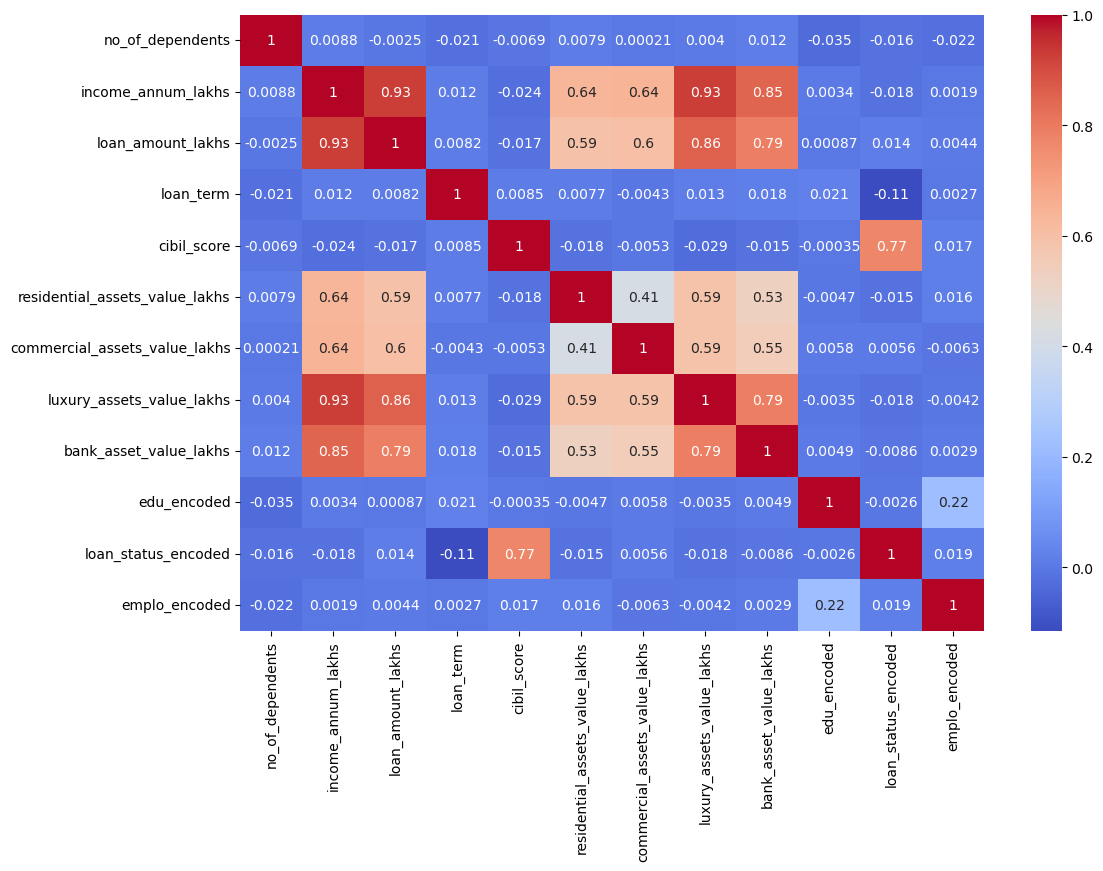

In [106]:
# lets now make heatmap of correlation
plt.figure(figsize=(12,8))
heat_corr= numdf.corr() # this makes correlation matrix

sns.heatmap(heat_corr,cmap='coolwarm',annot=True)
plt.show()

Income and loan amount almost directly proportional \
Income and loan amount having close direct relationships with the assest values

--------

# Model Building

## Using Logistic regression

In [108]:
numdf.head()

,no_of_dependents,income_annum_lakhs,loan_amount_lakhs,loan_term,cibil_score,residential_assets_value_lakhs,commercial_assets_value_lakhs,luxury_assets_value_lakhs,bank_asset_value_lakhs,edu_encoded,loan_status_encoded,emplo_encoded
0,2,96.0,299.0,12,778,24.0,176.0,227.0,80.0,3,1,2088.0
1,0,41.0,122.0,8,417,27.0,22.0,88.0,33.0,3,0,2088.0
2,3,91.0,297.0,20,506,71.0,45.0,333.0,128.0,1,0,2088.0
3,3,82.0,307.0,8,467,182.0,33.0,233.0,79.0,1,0,2088.0
4,5,98.0,242.0,20,382,124.0,82.0,294.0,50.0,4,0,2088.0


In [109]:
numdf['loan_status_encoded'].value_counts()
# need to do upscaling

1    2640
0    1601
Name: loan_status_encoded, dtype: int64

### Upscaling data since dataset is imbalanced

In [110]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = numdf[numdf['loan_status_encoded'] == 1]  # Replace with the majority class label
df_minority = numdf[numdf['loan_status_encoded'] == 0]  # Replace with the minority class label

# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),  # Match the number of majority class samples
                                 random_state=42)  # Set a seed for reproducibility

# Combine majority class with the upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display the upscaled DataFrame
print(df_upsampled['loan_status_encoded'].value_counts())


1    2640
0    2640
Name: loan_status_encoded, dtype: int64


In [111]:
df_upsampled.head()

,no_of_dependents,income_annum_lakhs,loan_amount_lakhs,loan_term,cibil_score,residential_assets_value_lakhs,commercial_assets_value_lakhs,luxury_assets_value_lakhs,bank_asset_value_lakhs,edu_encoded,loan_status_encoded,emplo_encoded
0,2,96.0,299.0,12,778,24.0,176.0,227.0,80.0,3,1,2088.0
6,5,87.0,330.0,4,678,225.0,148.0,292.0,43.0,1,1,1625.0
8,0,8.0,22.0,20,782,13.0,8.0,28.0,6.0,4,1,2088.0
10,4,29.0,112.0,2,547,81.0,47.0,95.0,31.0,1,1,1625.0
13,2,91.0,315.0,14,679,108.0,166.0,209.0,50.0,1,1,2088.0


In [180]:
# Let start by applying logistic regression
# need to normalize data first

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler= StandardScaler()

In [116]:
scaled_data = scaler.fit_transform(df_upsampled.drop('loan_status_encoded', axis=1))

In [117]:
# converting it into data frame

df_scaled = pd.DataFrame(scaled_data, columns=df_upsampled.drop('loan_status_encoded', axis=1).columns)

In [118]:
df_scaled.head()

,no_of_dependents,income_annum_lakhs,loan_amount_lakhs,loan_term,cibil_score,residential_assets_value_lakhs,commercial_assets_value_lakhs,luxury_assets_value_lakhs,bank_asset_value_lakhs,edu_encoded,emplo_encoded
0,-0.284517,1.611554,1.634321,0.151936,1.230838,-0.797327,2.839519,0.829067,0.914336,0.486879,0.889847
1,1.469084,1.288173,1.979923,-1.262918,0.647059,2.321934,2.206955,1.553700,-0.226628,-1.327321,-1.123789
2,-1.453585,-1.550389,-1.453797,1.566790,1.254189,-0.968032,-0.955868,-1.389425,-1.367591,1.393979,0.889847
3,0.884550,-0.795834,-0.450437,-1.616631,-0.117692,0.087240,-0.074796,-0.642495,-0.596670,-1.327321,-1.123789
4,-0.284517,1.431898,1.812696,0.505649,0.652896,0.506245,2.613603,0.628400,-0.010770,-1.327321,0.889847


In [124]:
print(df_scaled.shape)
print(df_upsampled['loan_status_encoded'].shape)

(5280, 11)
(5280,)


In [131]:
# Replace inf and -inf with NaN, then fill NaN with column mean or drop rows with inf values
df_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)
df_scaled.fillna(df.mean(), inplace=True)  # Or df.dropna(inplace=True) if you want to drop rows with inf


C:\Users\Om N. Gayamukhe\AppData\Local\Temp\ipykernel_31504\3581012249.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scaled.fillna(df.mean(), inplace=True)  # Or df.dropna(inplace=True) if you want to drop rows with inf


In [167]:
# applying logistic regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_upsampled['loan_status_encoded'], test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [170]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluation metrics
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

0.9043560606060606 0.9333333333333333 0.8716981132075472 0.9014634146341464 [[493  33]
 [ 68 462]]


In [171]:
print(f"Accuracy: '{accuracy:.4f}'")
print(f"Precision: '{precision:.4f}'")
print(f"Recall: '{recall:.4f}'")
print(f"F1 Score: '{f1:.4f}'")

Accuracy: '0.9044'
Precision: '0.9333'
Recall: '0.8717'
F1 Score: '0.9015'


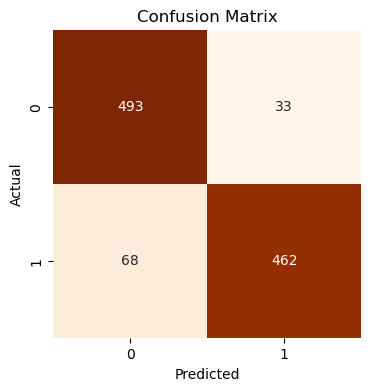

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False, square=True)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

## Using decision tree

Accuracy: '0.9754'
Precision: '0.9719'
Recall: '0.9792'
F1 Score: '0.9756'


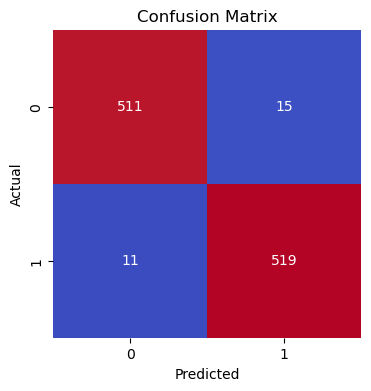

In [166]:
# let try decision tree
from sklearn.tree import DecisionTreeClassifier

model_tree= DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train,y_train)
y_pred = model_tree.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)




# Printing evaluation metrics with formatted output and quotation marks
print(f"Accuracy: '{accuracy:.4f}'")
print(f"Precision: '{precision:.4f}'")
print(f"Recall: '{recall:.4f}'")
print(f"F1 Score: '{f1:.4f}'")


plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False, square=True)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Decision tree has far better accuracy than logistic regression
# This may be because the dataset is non linear which is captured better by decision trees in comparision to 
# logistic reg which assumes linear relation between the variables

Very high value in metric raises suspicion of **overfitting incase of decision tree** which can checked
using cross validation methods.

In [182]:
# Very high value in metric raises suspicion of overfitting incase of decision tree which can checked
#using cross validation methods.
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(model_tree, X_train, y_train, cv=5)

# Print the mean cross-validation score
print(f"Cross-Validation Score: {cv_scores.mean():.4f}")
print(cv_scores)

Cross-Validation Score: 0.9839
[0.97988166 0.98343195 0.98579882 0.98579882 0.98459716]


### This indicates that Decision Tree Model works very well on our dataset and can be used as our Loan Prediction Model

----------

**The End** 